In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display as ld
from IPython.display import Audio
from scipy import stats

In [3]:
s1, sr = librosa.load('goat.wav', duration = 10)
s2, sr = librosa.load('balaclava.wav', duration = 10)
s3, sr = librosa.load('scary.wav', duration = 10)
#s4, sr = librosa.load('atw.wav', duration = 10)
#s5, sr = librosa.load('thepretender.wav', duration = 10)
#s6, sr = librosa.load('winner.wav', duration = 10)

In [5]:
S = np.array([s1, s2,s3])
A = np.random.rand(len(S),len(S))
X = A.dot(S)

In [6]:
Audio(X, rate=sr)

In [7]:
X.shape

(3, 220500)

c:\users\alexandre\appdata\local\programs\python\python38\lib\site-packages\librosa\util\utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


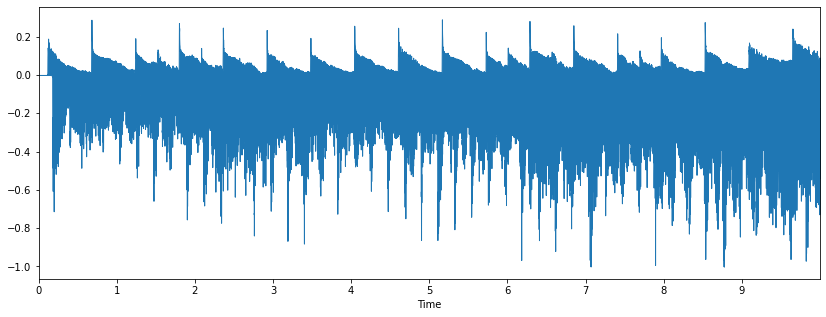

In [8]:
plt.figure(figsize =(14,5))
ld.waveplot(S,sr=sr, x_axis='time')

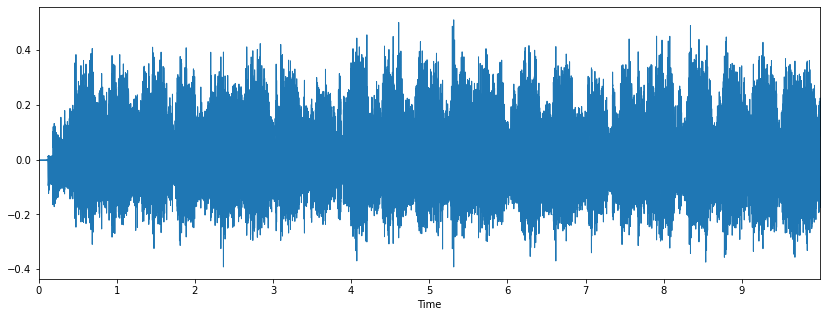

In [9]:
plt.figure(figsize =(14,5))
ld.waveplot(X,sr=sr, x_axis='time')

In [10]:
W = np.random.rand(len(X),len(X))
eta = 0.0001
I = np.eye(len(X),len(X))
for k in range (0,X.shape[1]):
    y = W.dot(X[:,k])
    fy = [[np.tanh(y[m])] for m in range (len(X))]
    W = W + eta*np.dot(I-(fy*y.T),(W))
Y = W.dot(X)
Y

array([[ 0.        ,  0.        ,  0.        , ...,  0.30920666,
         0.47263746,  0.77505917],
       [ 0.        ,  0.        ,  0.        , ...,  1.37387353,
         0.78636565, -0.12301128],
       [ 0.        ,  0.        ,  0.        , ...,  1.22375136,
         0.88933074,  0.89154486]])

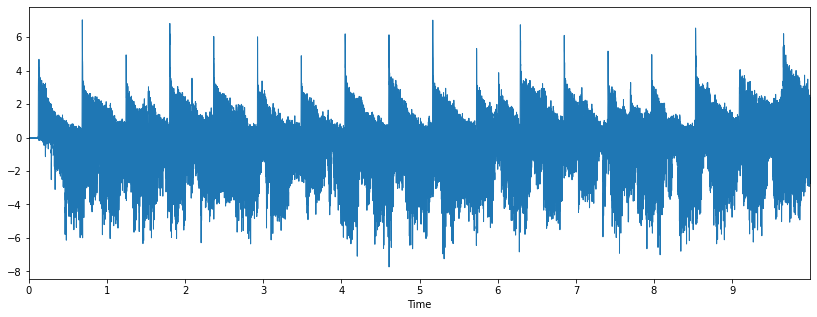

In [11]:
plt.figure(figsize=(14,5))
ld.waveplot(Y,sr=sr, x_axis='time')

In [12]:
#Normalização sinal original
Sn = [k/np.std(k) for k in S]
Sn = np.array(Sn)
print(np.var(Sn))

1.0000005


In [13]:
#Normalização sinal separado
Yn = [j/np.std(j) for j in Y]
Yn = np.array(Yn)
print(np.var(Yn))

1.0000004981269088


In [14]:
Audio(Yn[0], rate=sr)

In [15]:
Audio(Yn[1], rate=sr)

In [16]:
Audio(Yn[2], rate=sr)

In [17]:
#Cálculo da correlação de Pearson e separação dos pares de maior correlação
allarrays = list()
for p in range (0,len(X)): #Para comparar com S[0] e S[1]
    corrnova = 0
    corr = 0
    arrays = list()
    for o in range(0,len(X)): #Para comparar com Yn[0] e Yn[1]
        corrnova = stats.pearsonr(Sn[p],Yn[o])
        print(f'Correlação de Pearson vale {stats.pearsonr(Sn[p], Yn[o])[0]} entre a {p+1} linha de S e a {o+1} linha de Y')
        if np.abs(corrnova[0]) > np.abs(corr): 
            corr = corrnova[0]
            arrays.clear()
            if corr < 0:
                Yn[o] = Yn[o] * -1
            arrays.append(((Sn[p], Yn[o]),(p,o)))
    allarrays.append(arrays)

Correlação de Pearson vale 0.9722593031639136 entre a 1 linha de S e a 1 linha de Y
Correlação de Pearson vale 0.21921338500725843 entre a 1 linha de S e a 2 linha de Y
Correlação de Pearson vale -0.016274021885271574 entre a 1 linha de S e a 3 linha de Y
Correlação de Pearson vale 0.020061347655866264 entre a 2 linha de S e a 1 linha de Y
Correlação de Pearson vale 0.06721586853171194 entre a 2 linha de S e a 2 linha de Y
Correlação de Pearson vale 0.9972886230825295 entre a 2 linha de S e a 3 linha de Y
Correlação de Pearson vale 0.23514734292021924 entre a 3 linha de S e a 1 linha de Y
Correlação de Pearson vale -0.9733298521378855 entre a 3 linha de S e a 2 linha de Y
Correlação de Pearson vale 0.06417107884595068 entre a 3 linha de S e a 3 linha de Y


In [18]:
#Calculo do MSE entre os pares de maior correlação
mseall = list()
msgrafs = list()
for x in allarrays:
    mse = 0
    msgraf = list()
    for ponto in range (0,X.shape[1]):
        sqr = (x[0][0][0][ponto]- x[0][0][1][ponto])**2
        msgraf.append(sqr)
        mse += sqr
    msgrafs.append(msgraf)
    mse = mse/X.shape[1]
    posicao = x[0][1] #guarda posiçao das linhas de maior correlaçao
    mseall.append((mse, posicao))
for z in mseall:
    print(f'O erro quadrático médio entre a {(z[1][0])+1}ª linha de S e a {(z[1][1])+1}ª linha de Y é de {z[0]}')

O erro quadrático médio entre a 1ª linha de S e a 1ª linha de Y é de 0.05548142839259131
O erro quadrático médio entre a 2ª linha de S e a 3ª linha de Y é de 0.005422756284272033
O erro quadrático médio entre a 3ª linha de S e a 2ª linha de Y é de 0.053340306433622926


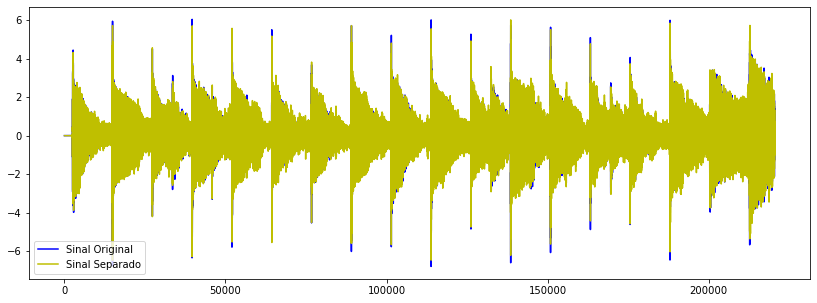

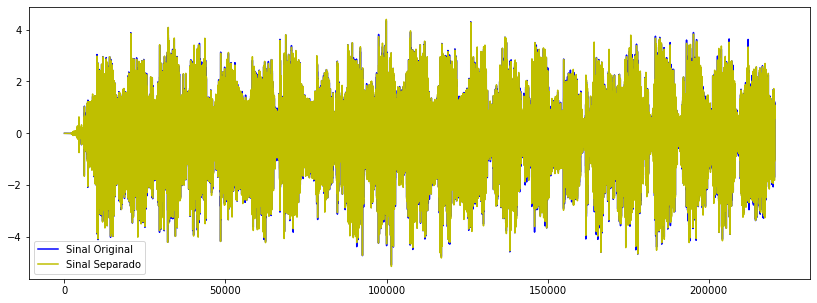

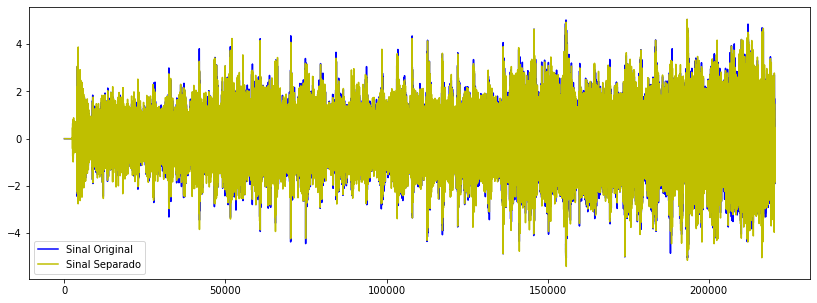

In [19]:
for a in mseall:
    indexS = a[1][0]
    indexY = a[1][1]
    plt.figure(figsize = (14,5))
    plt.plot(Sn[indexS], 'b')
    plt.plot(Yn[indexY], 'y')
    plt.legend(['Sinal Original', 'Sinal Separado'], loc = 'lower left')

In [20]:
grafmse = np.array(msgraf)

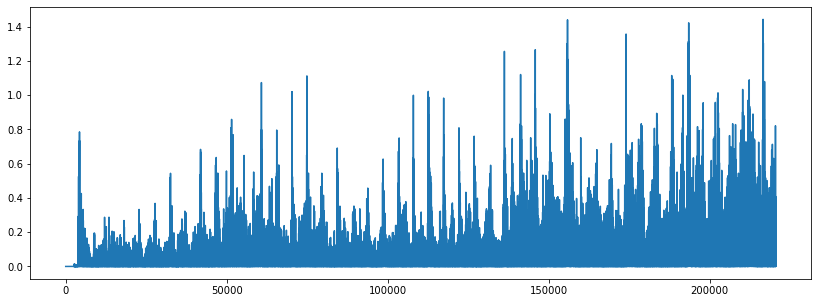

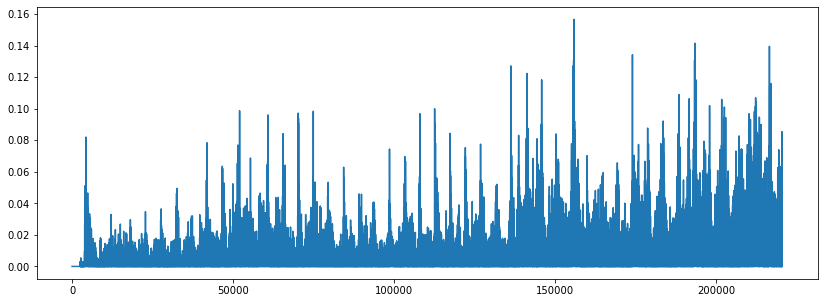

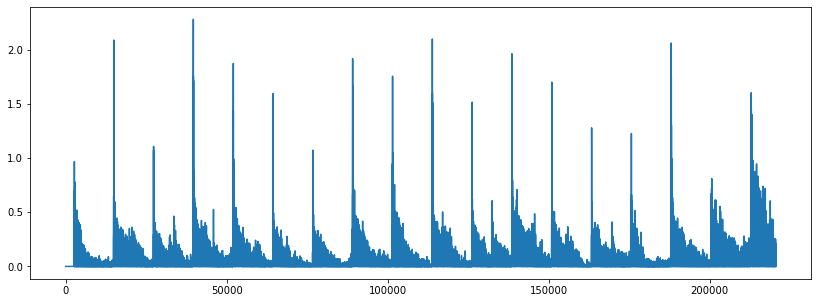

In [21]:
for graf in range (0, len(msgrafs)):
    plt.figure(figsize = (14,5))
    plt.plot(msgrafs[graf])